In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
per=pd.read_csv('dataset-performa-mahasiswa.csv')
print("Dataset performa mahasiswa:")
display(per)

Dataset performa mahasiswa:


,jenis-kelamin,jalur-masuk,jenis-tempat-tinggal,pendidikan-terakhir-orangtua,status-ukm,absensi,IPK
0,perempuan,snmptn-nonkip,bersama-orang-tua,pernah-kuliah,ikut,92,3
1,lelaki,snmptn-nonkip,bersama-orang-tua,belum-pernah-kuliah,ikut,90,3
2,perempuan,sbmptn-nonkip,rumah-sendiri,pernah-kuliah,ikut,95,3
3,lelaki,sbmptn-kip,kos-kontrakan,belum-pernah-kuliah,ikut,71,2
4,lelaki,snmptn-nonkip,bersama-orang-tua,pernah-kuliah,ikut,74,2
...,...,...,...,...,...,...,...
995,lelaki,sbmptn-nonkip,bersama-orang-tua,pernah-kuliah,tidak-ikut,84,3
996,lelaki,snmptn-nonkip,kos-kontrakan,pernah-kuliah,tidak-ikut,91,3
997,perempuan,sbmptn-nonkip,bersama-orang-tua,belum-pernah-kuliah,tidak-ikut,87,3
998,perempuan,snmptn-nonkip,bersama-orang-tua,belum-pernah-kuliah,tidak-ikut,79,2


In [3]:
print("Informasi dataset: ")
display(per.info())

Informasi dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   jenis-kelamin                 1000 non-null   object
 1   jalur-masuk                   1000 non-null   object
 2   jenis-tempat-tinggal          1000 non-null   object
 3   pendidikan-terakhir-orangtua  1000 non-null   object
 4   status-ukm                    1000 non-null   object
 5   absensi                       1000 non-null   int64 
 6   IPK                           1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


None

In [4]:
print("Deskripsi dataset")
display(per.describe())

Deskripsi dataset


,absensi,IPK
count,1000.00000,1000.000000
mean,82.73200,2.871000
std,14.01237,0.764816
min,50.00000,1.000000
25%,74.00000,3.000000
50%,86.00000,3.000000
75%,93.25000,3.000000
max,100.00000,4.000000


In [5]:
print("Mengecek data yang null")
display(per.isnull().sum())

Mengecek data yang null


jenis-kelamin                   0
jalur-masuk                     0
jenis-tempat-tinggal            0
pendidikan-terakhir-orangtua    0
status-ukm                      0
absensi                         0
IPK                             0
dtype: int64

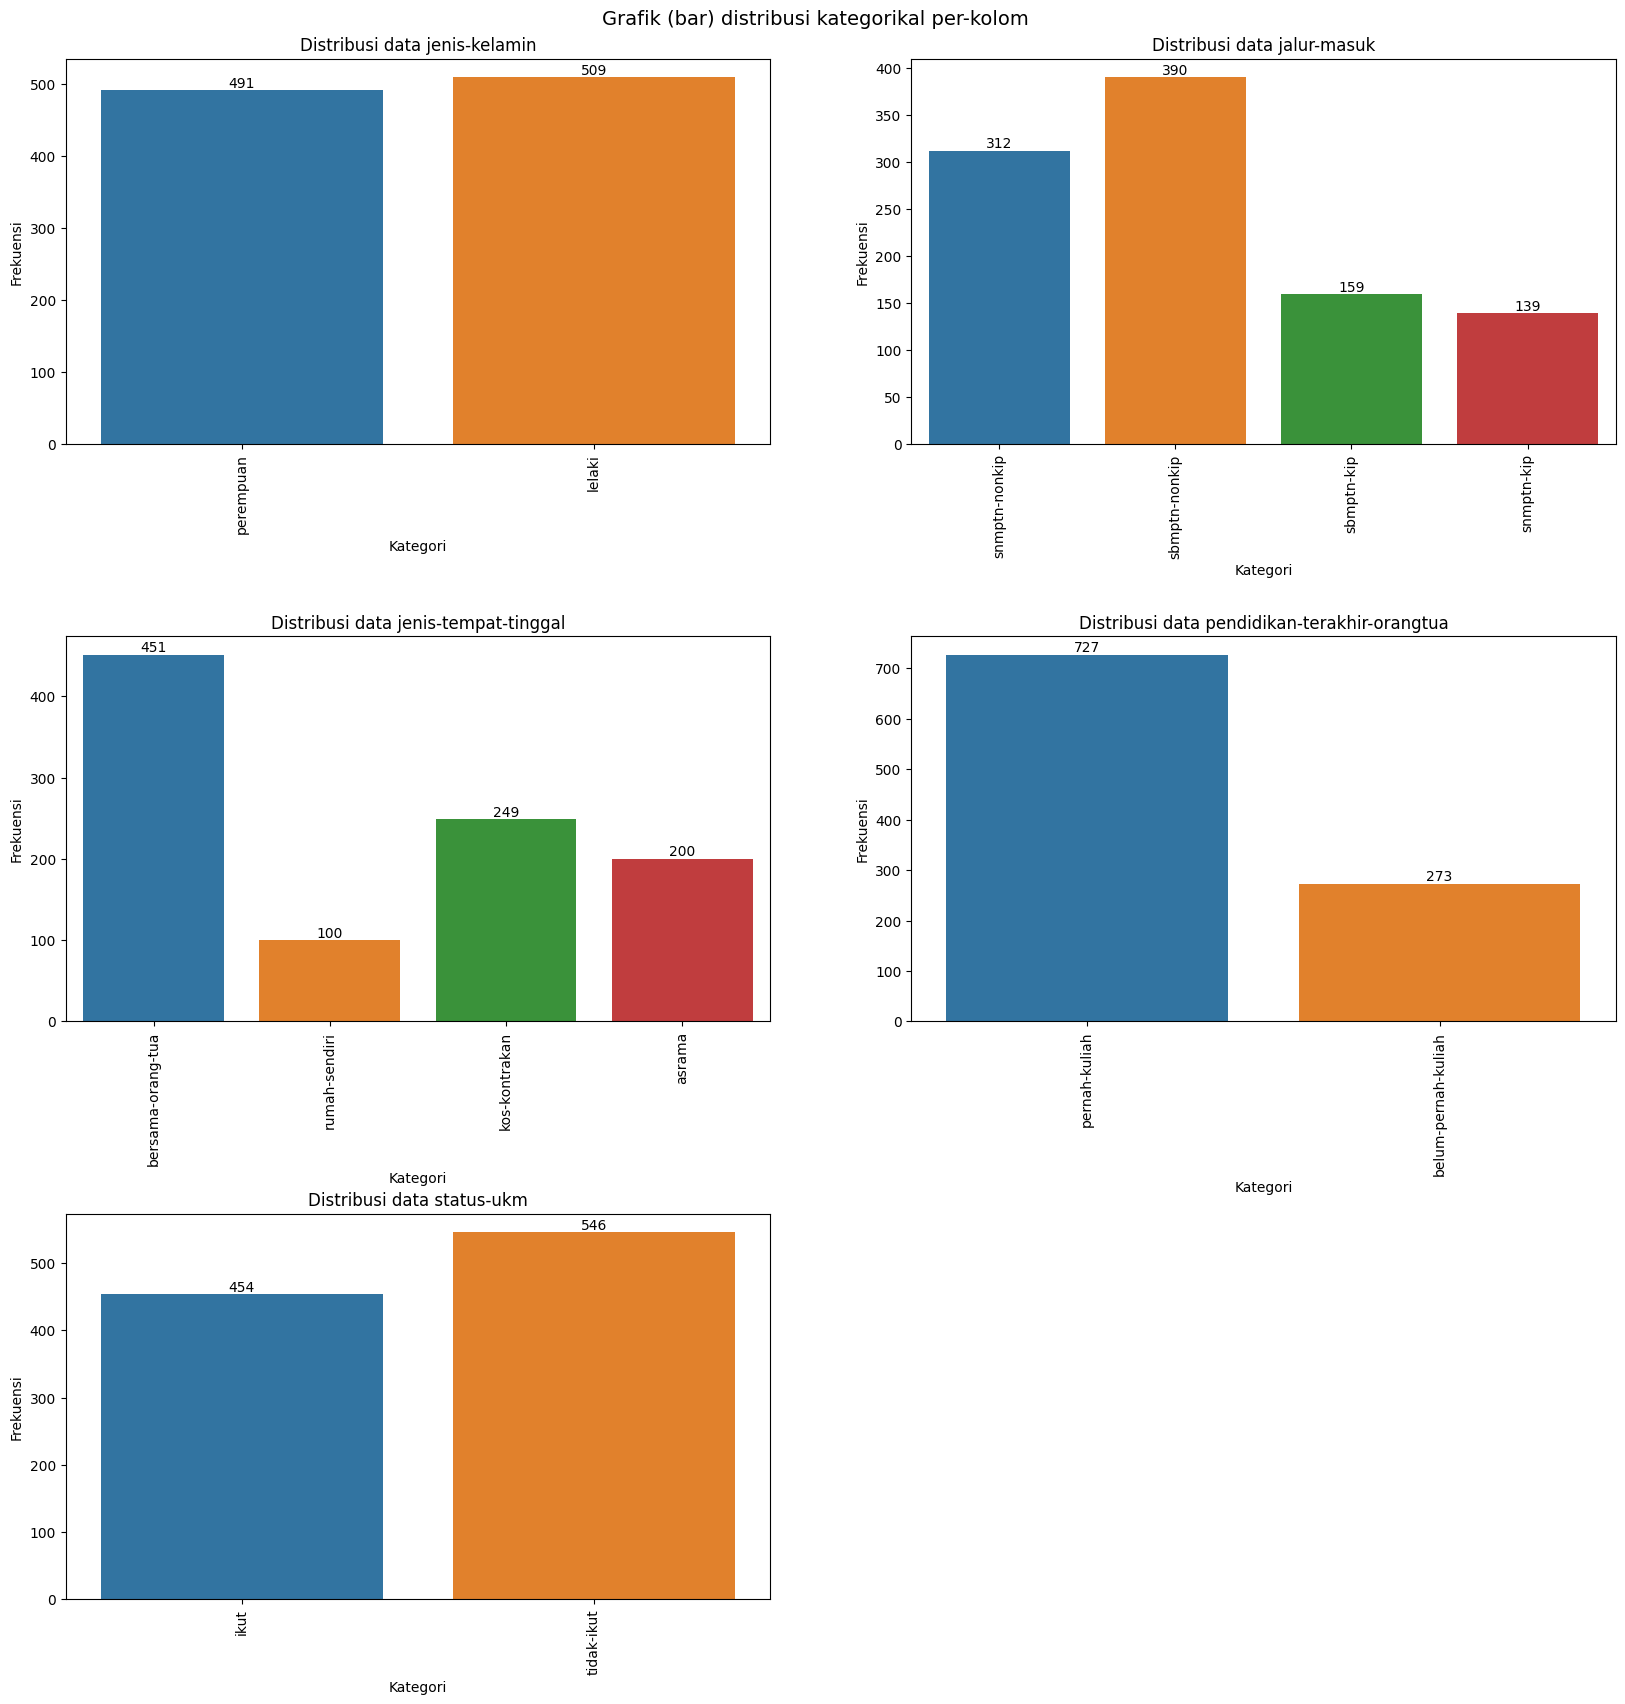

In [6]:
cat_cols = ["jenis-kelamin", "jalur-masuk", "jenis-tempat-tinggal", "pendidikan-terakhir-orangtua", "status-ukm"]
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

for i, col in enumerate(cat_cols):
    r = i // 2
    c = i % 2
    sns.countplot(x=col, data=per, ax=axes[r, c])
    for container in axes[r, c].containers:
        axes[r, c].bar_label(container, label_type="edge")
    axes[r, c].set_xlabel("Kategori")
    axes[r, c].set_ylabel("Frekuensi")
    axes[r, c].set_xticklabels(axes[r, c].get_xticklabels(), rotation="vertical")
    axes[r, c].set_title(f"Distribusi data {col}")

if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.9, "Grafik (bar) distribusi kategorikal per-kolom", va="center", ha="center", fontsize=14)
plt.show()


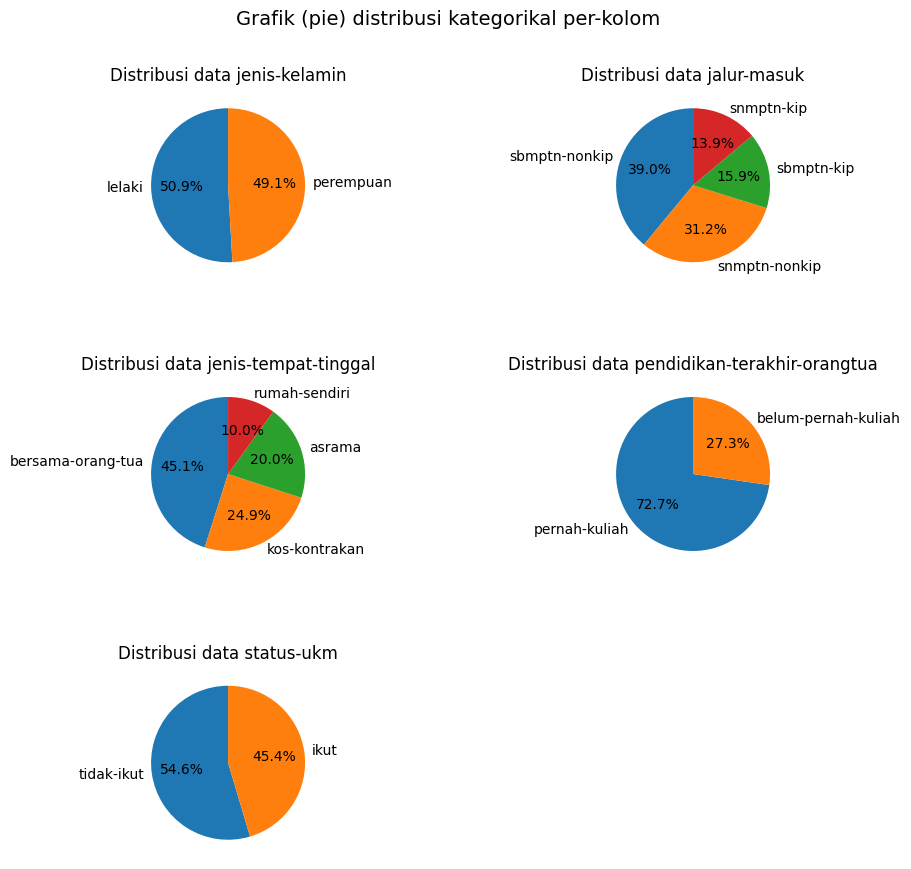

In [7]:
cat_cols = ["jenis-kelamin", "jalur-masuk", "jenis-tempat-tinggal", "pendidikan-terakhir-orangtua", "status-ukm"]
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, col in enumerate(cat_cols):
    r = i // 2
    c = i % 2
    counts = per[col].value_counts()
    axes[r, c].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[r, c].set_title(f"Distribusi data {col}")
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.text(0.5, 0.95, "Grafik (pie) distribusi kategorikal per-kolom", va="center", ha="center", fontsize=14)
plt.show()

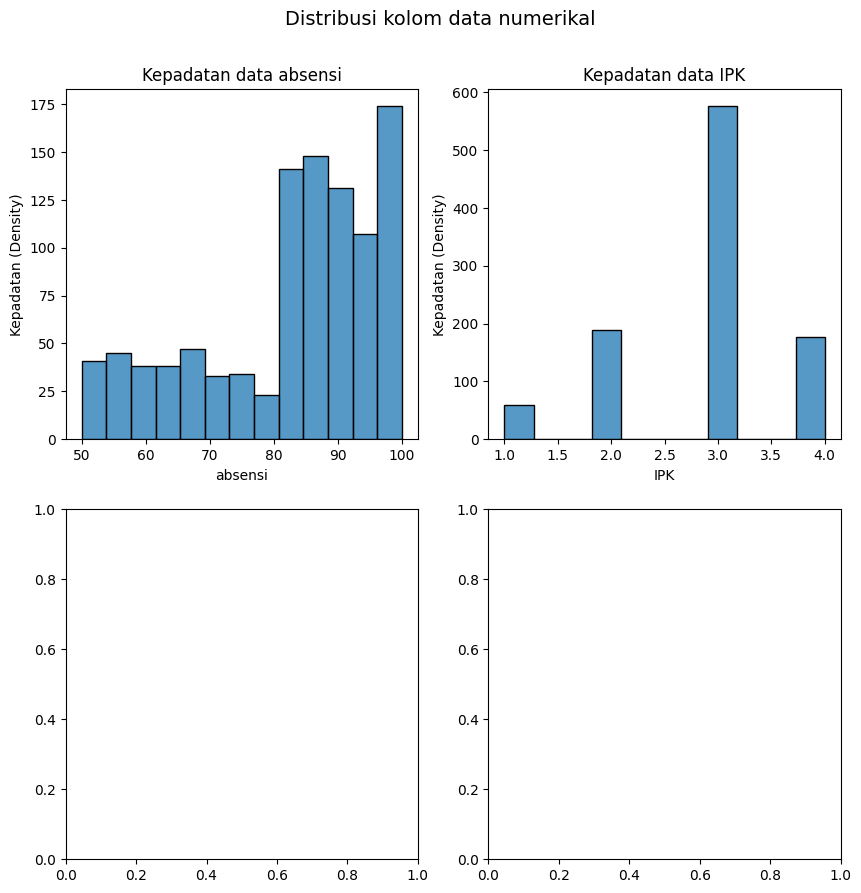

In [8]:
num_cols = ["absensi", "IPK"]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(num_cols):
    r, c = i // 2, i % 2
    sns.histplot(data=per, x=per[col], ax=axes[r, c])  # Perbaikan di sini
    axes[r, c].set_ylabel("Kepadatan (Density)")
    axes[r, c].set_title(f"Kepadatan data {col}")
if len(num_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
fig.text(0.5, 0.95, "Distribusi kolom data numerikal", va="center", ha="center", fontsize=14)
plt.show()


In [9]:
print("Memeriksa interval confidence skor absensi dan IPK sebelum membuat kolom baru untuk variabel target")
nilai_cols = ["absensi", "IPK"]
np.random.seed(10)
sample_size = 1000

for col in nilai_cols:
    print(f"\n{col}:")
    sample = np.random.choice(a=per[col], size=sample_size)
    sample_mean = sample.mean()
    z_critical = stats.norm.ppf(q=0.95)
    print("nilai Z critical:")
    print(z_critical)
    pop_stdev = per[col].std()
    print("Deviasi standar populasi:")
    print(pop_stdev)
    margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    print("Interval confidence:")
    print(confidence_interval)
    print(f"True mean dari {col}:")
    print(per[col].mean())

Memeriksa interval confidence skor absensi dan IPK sebelum membuat kolom baru untuk variabel target

absensi:
nilai Z critical:
1.6448536269514722
Deviasi standar populasi:
14.012370339186818
Interval confidence:
(82.16814881577568, 83.62585118422433)
True mean dari absensi:
82.732

IPK:
nilai Z critical:
1.6448536269514722
Deviasi standar populasi:
0.7648162811708077
Interval confidence:
(2.8432182044328025, 2.9227817955671975)
True mean dari IPK:
2.871


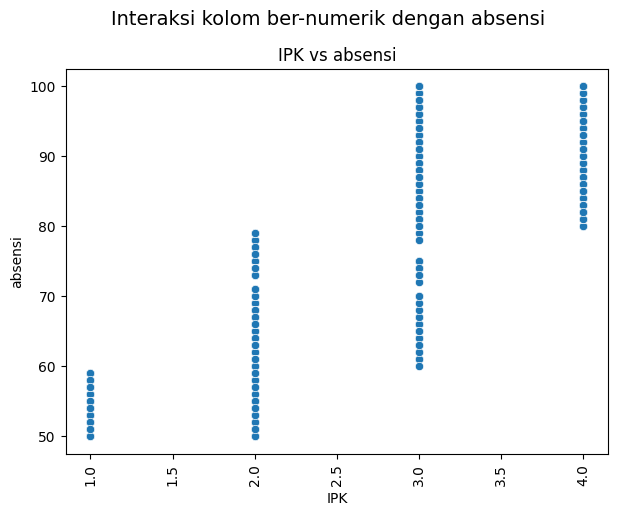

In [10]:
num_cols = ["IPK"]
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(x=num_cols[0], y="absensi", data=per, ax=ax)
ax.set_xlabel(f"{num_cols[0]}")
ax.set_ylabel("absensi")
ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")
ax.set_title(f"{num_cols[0]} vs absensi")

fig.suptitle("Interaksi kolom ber-numerik dengan absensi", va="center", ha="center", fontsize=14)
plt.show()

In [11]:
label_encoders={}
for col in cat_cols:
    le=LabelEncoder()
    per[col]=le.fit_transform(per[col])
    label_encoders[col]=le
print("Enkoding label kepada kolom yang berkategorikal:")
display(per.head())
print("\nDetail endkoding: ")
for column, encoder in label_encoders.items():
    print(f"{column} Kelas enkoder label: {encoder.classes_}")

Enkoding label kepada kolom yang berkategorikal:


,jenis-kelamin,jalur-masuk,jenis-tempat-tinggal,pendidikan-terakhir-orangtua,status-ukm,absensi,IPK
0,1,3,1,1,0,92,3
1,0,3,1,0,0,90,3
2,1,1,3,1,0,95,3
3,0,0,2,0,0,71,2
4,0,3,1,1,0,74,2



Detail endkoding: 
jenis-kelamin Kelas enkoder label: ['lelaki' 'perempuan']
jalur-masuk Kelas enkoder label: ['sbmptn-kip' 'sbmptn-nonkip' 'snmptn-kip' 'snmptn-nonkip']
jenis-tempat-tinggal Kelas enkoder label: ['asrama' 'bersama-orang-tua' 'kos-kontrakan' 'rumah-sendiri']
pendidikan-terakhir-orangtua Kelas enkoder label: ['belum-pernah-kuliah' 'pernah-kuliah']
status-ukm Kelas enkoder label: ['ikut' 'tidak-ikut']


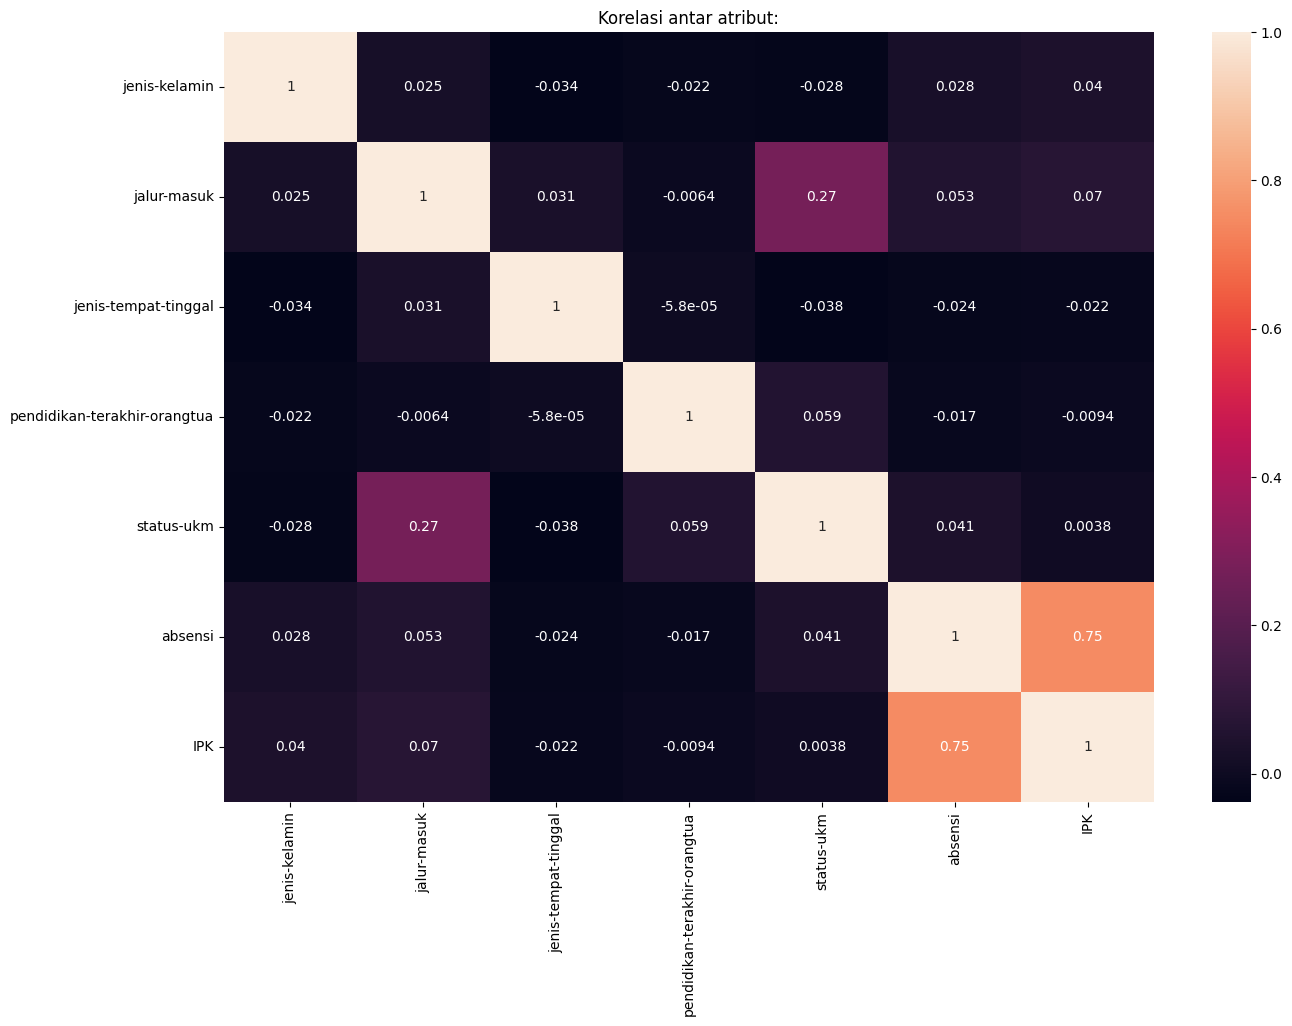

In [12]:
plt.figure(figsize=(15,10))
plt.title('Korelasi antar atribut:')
sns.heatmap(per.corr(),annot=True)
plt.show()

In [13]:
y=per["IPK"]
x=per.drop("IPK", axis=1)
print("Input variabel:")
display(x)
print()
print("Output:")
display(y)

Input variabel:


,jenis-kelamin,jalur-masuk,jenis-tempat-tinggal,pendidikan-terakhir-orangtua,status-ukm,absensi
0,1,3,1,1,0,92
1,0,3,1,0,0,90
2,1,1,3,1,0,95
3,0,0,2,0,0,71
4,0,3,1,1,0,74
...,...,...,...,...,...,...
995,0,1,1,1,1,84
996,0,3,2,1,1,91
997,1,1,1,0,1,87
998,1,3,1,0,1,79



Output:


0      3
1      3
2      3
3      2
4      2
      ..
995    3
996    3
997    3
998    2
999    3
Name: IPK, Length: 1000, dtype: int64

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("Bentuk setelah pemisahan dengan train-test:")
print(f"Training input: {x_train.shape}")
print(f"Testing input: {x_test.shape}")
print(f"Testing output: {y_train.shape}")
print(f"Testing output: {y_test.shape}")

Bentuk setelah pemisahan dengan train-test:
Training input: (750, 6)
Testing input: (250, 6)
Testing output: (750,)
Testing output: (250,)


In [15]:
models=[LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(),
        RandomForestRegressor(), ExtraTreesRegressor()]
r2_scores=[]
for model in models:
    print("Model yang digunakan:")
    display(model)
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    r2=r2_score(y_test, y_pred)
    print(f"Skor R2: {r2}")
    r2_scores.append(r2)
    print("\n")
max_r2=max(r2_scores)
print(f"Skor R2 terbaik: {max_r2}.")
max_idx=r2_scores.index(max_r2)
best_model=models[max_idx]
print(f"Model terbaik: {best_model}.")

Model yang digunakan:


LinearRegression()

Skor R2: 0.6042179439456867


Model yang digunakan:


Lasso()

Skor R2: 0.595555201467256


Model yang digunakan:


Ridge()

Skor R2: 0.6042267438633778


Model yang digunakan:


KNeighborsRegressor()

Skor R2: 0.5787780392624148


Model yang digunakan:


SVR()

Skor R2: 0.6007017663291266


Model yang digunakan:


DecisionTreeRegressor()

Skor R2: 0.30510664601269044


Model yang digunakan:


RandomForestRegressor()

Skor R2: 0.5301426776319285


Model yang digunakan:


ExtraTreesRegressor()

Skor R2: 0.45241883818900386


Skor R2 terbaik: 0.6042267438633778.
Model terbaik: Ridge().


In [16]:
print(f"Evaluasi model {best_model}:")
best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
print("\nSkor R2:")
print(r2_score(y_test, y_pred))
print("\nMean Absolute Error (MEA):")
print(mean_absolute_error(y_test, y_pred))
print("\nMean Squared Error (MSE):")
print(mean_squared_error(y_test, y_pred))

Evaluasi model Ridge():

Skor R2:
0.6042267438633778

Mean Absolute Error (MEA):
0.3729555533933517

Mean Squared Error (MSE):
0.21257139896400434


In [17]:
label_encoders

{'jenis-kelamin': LabelEncoder(),
 'jalur-masuk': LabelEncoder(),
 'jenis-tempat-tinggal': LabelEncoder(),
 'pendidikan-terakhir-orangtua': LabelEncoder(),
 'status-ukm': LabelEncoder()}

In [18]:
encoded_values = {}
jenis_kelamin = "lelaki"
jalur_masuk = "sbmptn-kip"
jenis_tempat_tinggal = "bersama-orang-tua"
pendidikan_terakhir_orangtua = "belum-pernah-kuliah"
status_ukm = "ikut"
absensi = 85

print([jenis_kelamin, jalur_masuk, jenis_tempat_tinggal, pendidikan_terakhir_orangtua, status_ukm, absensi])

cols_to_encode = {
    "jenis-kelamin": jenis_kelamin,
    "jalur-masuk": jalur_masuk,
    "jenis-tempat-tinggal": jenis_tempat_tinggal,
    "pendidikan-terakhir-orangtua": pendidikan_terakhir_orangtua,
    "status-ukm": status_ukm
}

for col, val in cols_to_encode.items():
    le = label_encoders[col]
    encoded_values[col] = le.transform([val])

print("Nilai yang di-encode-kan: ")
display(encoded_values)
print()

new_data = pd.DataFrame(encoded_values)
new_data['absensi'] = float(absensi)

print("Prediksi: ")
display(new_data)
print()

pred_ipk = best_model.predict(new_data)
pred_ipk = round(pred_ipk[0], 2)

print(f"IPK yang diprediksi: {pred_ipk}")
new_data["IPK"] = pred_ipk

print("\nHasil prediksi lengkap:")
display(new_data)


['lelaki', 'sbmptn-kip', 'bersama-orang-tua', 'belum-pernah-kuliah', 'ikut', 85]
Nilai yang di-encode-kan: 


{'jenis-kelamin': array([0]),
 'jalur-masuk': array([0]),
 'jenis-tempat-tinggal': array([1]),
 'pendidikan-terakhir-orangtua': array([0]),
 'status-ukm': array([0])}


Prediksi: 


,jenis-kelamin,jalur-masuk,jenis-tempat-tinggal,pendidikan-terakhir-orangtua,status-ukm,absensi
0,0,0,1,0,0,85.0



IPK yang diprediksi: 2.94

Hasil prediksi lengkap:


,jenis-kelamin,jalur-masuk,jenis-tempat-tinggal,pendidikan-terakhir-orangtua,status-ukm,absensi,IPK
0,0,0,1,0,0,85.0,2.94
